In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.realpath('..'))

In [14]:
import numpy as np
import plotly.express as ex
import plotly.graph_objects as go
import pandas as pd
import cache_magic

from math import sqrt
from numpy import exp

from tracking.motion import ConstantVelocityModel, constant_velocity_models
from tracking.target import ConstantAccelerationTarget, ConstantVelocityTarget, SinusTarget, SingerTarget
from tracking.kalman import kalman_pv
from tracking.evaluation import monte_carlo, rmse, execute, state_residuals
from tracking.kalman.convergence import kalman_gain_cv, cv_error_variances

from tracking.plot import boxplot_rmse, aggregated_errors, plot_aggregated_errors, plot_error_band
from tracking.util import to_df, as_png

In [12]:
R = 5
Q = .1
res = np.array([kalman_gain_cv(R*x, Q*x) for x in np.arange(1, 20)/5.0]).squeeze()

In [13]:
res

array([[0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ],
       [0.41246871, 0.1084003 ]])

In [15]:
R = 5
Q = 2
a = 1

In [23]:
K = kalman_gain_cv(R, Q).squeeze()
cv_error_variances(*K.tolist(), R)

(6.06885486108256, 0.8406033608177479)

In [27]:
def predict_rmse(R, Q, a, t=1):
    Kx, Kv = kalman_gain_cv(R, Q, t=t)
    Vx, Vv, Cov_xv = cv_estimator_variances(Kx[0], Kv[0], R, t=t)

    mu_x = a*t/Kv
    sigma_x = sqrt(Vx + t*Vv + 2*t*Cov_xv)

    return np.sqrt(mu_x**2 + sigma_x**2 *3)[0]

In [41]:
R = 5
a = 1

Qs = np.concatenate((np.arange(1, 100)/20, np.arange(6, 20), np.arange(5, 10)**2))
rmse = np.array([predict_rmse(R, Q, a) for Q in Qs])

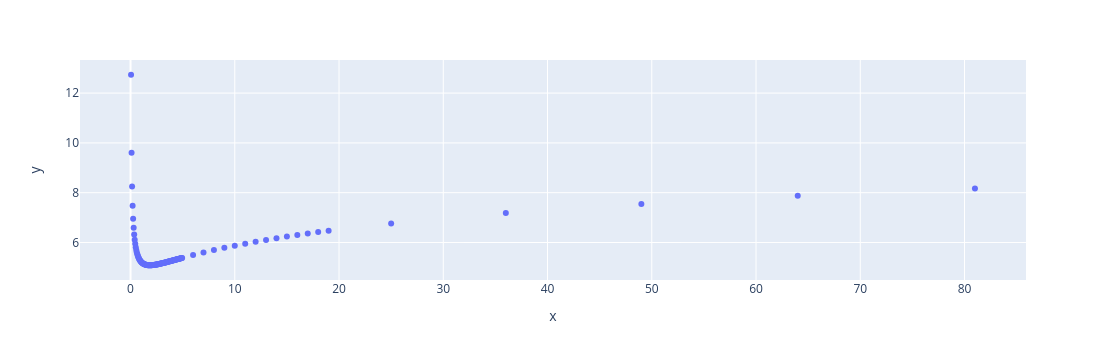

In [42]:
ex.scatter(x=Qs, y=rmse)